In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from core import *
from utils import *
import pandas as pd

In [2]:
import imageio.v3 as iio
from PIL import Image

im = iio.imread('../balanced_data/Phantom.png')
phantom_img = Image.fromarray(im).resize((32, 32))
phantom_img = np.array(phantom_img.convert('L')) / 255


In [3]:
params = {
    "no_of_detectors": 32,
    "source_to_object": 10,
    "source_to_detector": 15,
    "size_of_object": 10,
    "no_of_rotations": 32,
    "resolution": 32
}

In [4]:
# Theta calculation. MAX CHANCES OF ERROR (unclear info) 
theta_fan = 2 * np.arctan(5/15)
params['angle_bw_detectors'] = theta_fan/32

In [5]:
data = pd.read_csv('../balanced_data/projection_data_phantom.dat', header=None)

In [6]:
d = data.to_numpy().flatten()
d.shape

(1024,)

In [7]:
recon = Reconstruction(**params)
recon.A.shape

Performing decomposition:  93%|█████████▎| 948/1024 [02:10<00:10,  7.26it/s]


Matrix has shape = (1024, 1024)
Matrix has Rank = 948


(1024, 1024)

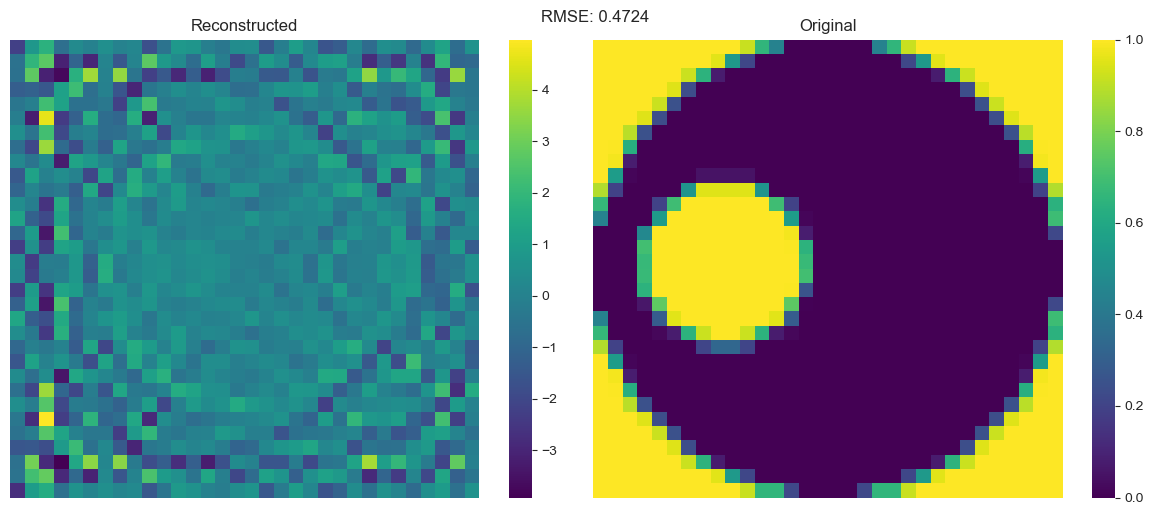

In [8]:
x_img = recon.solve(d)
# plt.imshow(x_img)

plot_images(x_img, phantom_img)

Forward Problem

In [9]:
x = phantom_img.flatten()
d_recon = recon.A @ x

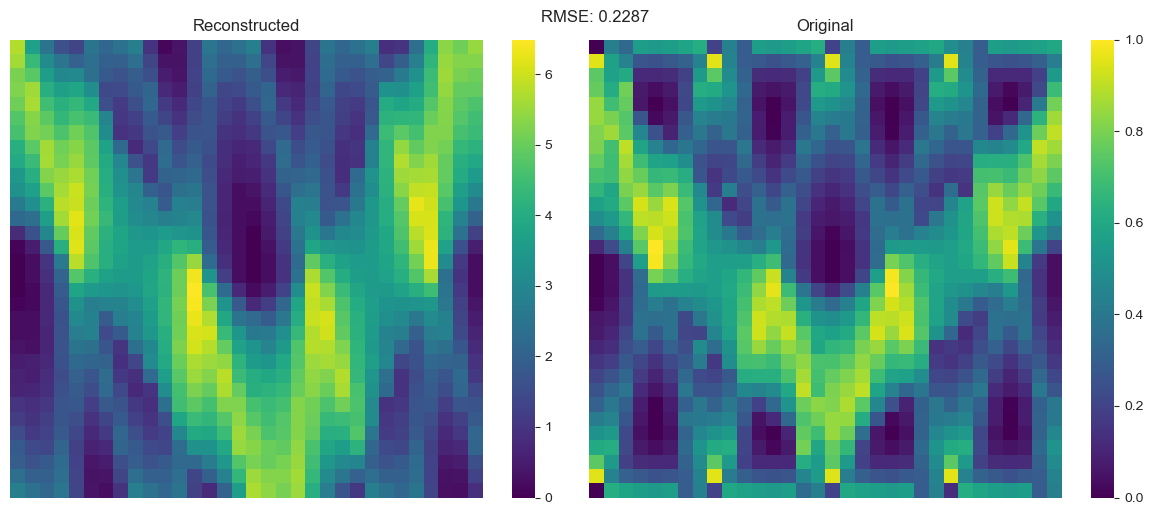

In [10]:
plot_images(d_recon.reshape(32, 32), d.reshape(32, 32))

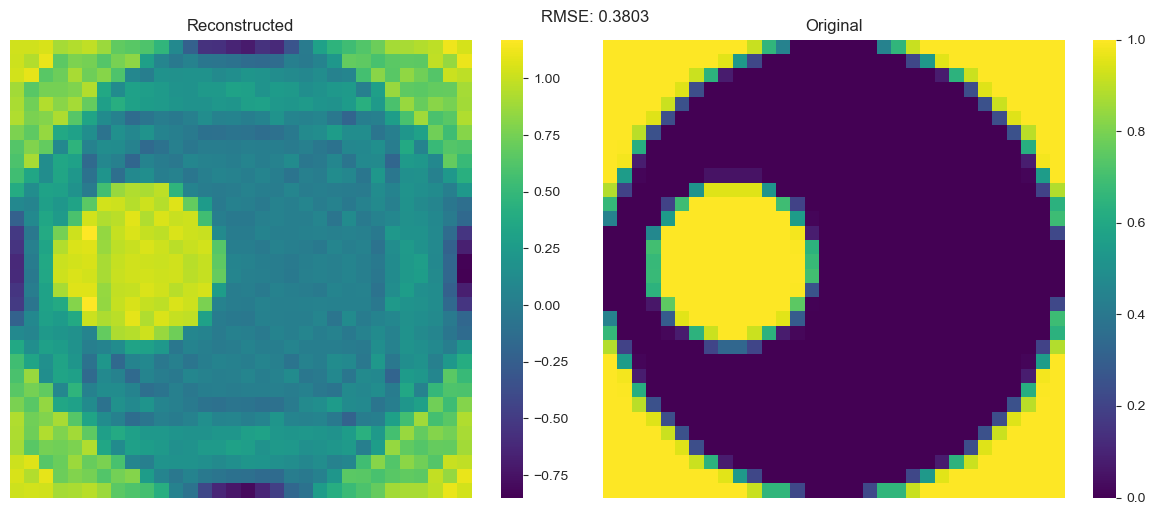

In [11]:
x_recon_img = recon.solve(d_recon)
plot_images(x_recon_img, phantom_img)